## Question 1

Write an efficient algorithm that searches for a value target in an m x n integer matrix. This matrix has the following properties:

Integers in each row are sorted from right to left.

The first integer of each row is greater than the last integer of the previous row.

                              Example-: 

                                        Input: matrix = [[1,3,5,7],[10,11,16,20],[23,30,34,60]], target = 3

                                         Output: True

In [134]:
def search_target(arr, target):
    row = 0
    col = len(arr[row]) - 1
    while (row < len(arr) and col >= 0):
        if (arr[row][col] == target):
            return [row, col]
 
        
        if (arr[row][col] < target):
            row += 1
 
        
        else:
            col -= 1
 
    return [-1, -1]

In [135]:
matrix = [[1,3,5,7],[10,11,16,20],[23,30,34,60]]
ans = search_target(matrix, 3)
print("Element found at index: ", ans)

Element found at index:  [0, 1]


##  Question 2

2.  Write a program that takes a string as input, and counts the frequency of each word in the string, 
there might  be repeated characters in the string. Your task is to find the highest frequency and returns 
the length of the  highest-frequency word. 

Note - You have to write at least 2 additional test cases in which your program will run successfully and provide  an explanation for the same.  

Example input - string = “write write write all the number from from from 1 to 100” 

Example output - 5 

Explanation - From the given string we can note that the most frequent words are “write” and “from” and 
the maximum value of both the values is “write” and its corresponding length is 5 

In [43]:
def freq_count(text):
    freq_dict = {}
    # get the list of words from string
    word_list = text.split()
    
    for word in word_list:
        freq = word_list.count(word)
        freq_dict[word] = freq
        
    # dictionary with keys as word and value as its frequency
    print(freq_dict)
    max_freq_value =  max(freq_dict.values())
    print(max_freq_value)
    
    # get word with highest frequency
    high_freq_words = [words for words in freq_dict if freq_dict[words]==max_freq_value]
    print(f"words with max frequency {high_freq_words}")
    
    # get word with max len 
    len_words = [len(word) for word in high_freq_words]
    return max(len_words)

In [44]:
input = "write write write all the number from from from 1 to 100"
len_high_freq_word = freq_count(input)
print(f"max length of highest frequency word is {len_high_freq_word}")

{'write': 3, 'all': 1, 'the': 1, 'number': 1, 'from': 3, '1': 1, 'to': 1, '100': 1}
3
words with max frequency ['write', 'from']
max length of highest frequency word is 5


In [46]:
# input for test_case 1 : 
#"write write write"
input1 = "write write write"
len_high_freq_word = freq_count(input1)
print(f"length of highest frequency word is {len_high_freq_word}")

{'write': 3}
3
words with max frequency ['write']
length of highest frequency word is 5


In [50]:
# input for test_case 1 : 
#"writeeee write write from from from"
input2 = "writeeee write write from from from dtfy dtfy dtfy"
len_high_freq_word = freq_count(input2)
print(f"length of highest frequency word is {len_high_freq_word}")

{'writeeee': 1, 'write': 2, 'from': 3, 'dtfy': 3}
3
words with max frequency ['from', 'dtfy']
length of highest frequency word is 4


## EDA and Feature Engineering on Bengaluru housing dataset

Train an SVM regressor on : Bengaluru housing dataset

                  Must include in details:

                           - EDA

                            - Feature engineering 



In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [107]:
data = pd.read_csv("Bengaluru_House_Data.csv")

In [108]:
data.shape

(13320, 9)

In [109]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [111]:
# Check if there are ay null values
data.isnull().any()

area_type       False
availability    False
location         True
size             True
society          True
total_sqft      False
bath             True
balcony          True
price           False
dtype: bool

Feature location,size,society,bath,balcony contains null values

In [112]:
# Separate categorical and numeric features
cat_cols  = [cols for cols in data.columns if data[cols].dtype=="O"]
num_cols  = [cols for cols in data.columns if data[cols].dtype!="O"]

## Univariate Analysis of numeric features

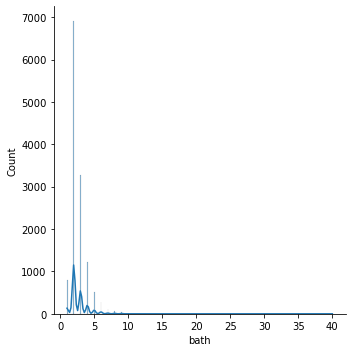

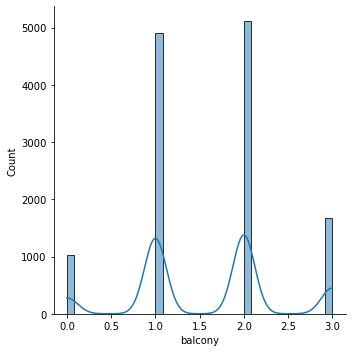

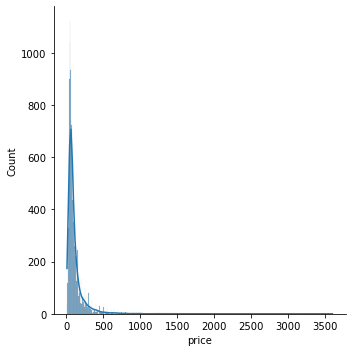

In [113]:
def plot_distribution_plot(feature):
    sns.displot(data=data,x= cols, kde = True)

for cols in data[num_cols]:
    plot_distribution_plot(cols)

Numeric features are highly skewed.

## Univariate Analysis of categorical features

In [119]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,GrrvaGr,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,GrrvaGr,1200,2.0,1.0,51.00


## handling null values

In [116]:
# Fill nulls in categorical features with mode
for cols in cat_cols:
    data[cols].fillna(data[cols].mode()[0], inplace=True)

In [117]:
# Fill nulls in numeric features with avearge value
for cols in num_cols:
    data[cols].fillna(data[cols].mean(), inplace=True)

## feature encoding

In [73]:
data['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [76]:
data['availability'].value_counts()

Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64

In [78]:
# Use Target encoding
# Replace categorical feature with average of target for each category
def target_encoding(cols):
    # group the feature based on category and get mean price of each category
    group_mean = data.groupby(cols)['price'].mean().to_dict()
    # map the category with mean
    data[cols] = data[cols].map(group_mean)

for cols in cat_cols:
    target_encoding(cols)

In [79]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,92.971757,111.379351,48.316667,57.555944,53.810000,76.755833,2.0,1.0,39.07
1,208.495486,115.179137,115.015882,265.067379,121.615385,229.958333,5.0,3.0,120.00
2,104.285498,115.179137,61.252527,104.953519,127.209858,106.263478,2.0,3.0,62.00
3,92.971757,115.179137,115.348261,104.953519,116.895455,85.550000,3.0,1.0,95.00
4,92.971757,115.179137,95.630303,57.555944,127.209858,110.794923,2.0,1.0,51.00


In [89]:
X = data.drop(['price'],axis=1)
Y = data['price']

In [90]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)

In [91]:
x_train.shape

(9324, 8)

In [92]:
x_test.shape

(3996, 8)

## Feature scaling

In [93]:
# Using standard scaler to scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled  = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [124]:
x_train_scaled

array([[-1.99818837e-01,  1.28257405e+01, -4.53065007e-01, ...,
        -6.05616080e-03,  2.52540418e-01,  1.77462919e+00],
       [-1.99818837e-01,  1.34555648e-01,  5.52431884e-02, ...,
         1.06550638e-01,  2.52540418e-01,  1.77462919e+00],
       [ 2.36454245e+00,  1.34555648e-01,  1.56117784e-01, ...,
        -1.85762039e-01, -5.28274944e-01, -7.37003931e-01],
       ...,
       [-1.99818837e-01,  1.34555648e-01, -5.58428544e-01, ...,
        -4.76796739e-01, -5.28274944e-01, -1.99282049e+00],
       [-4.78223245e-01,  1.34555648e-01, -4.78115115e-01, ...,
        -3.14254345e-01,  2.52540418e-01,  1.77462919e+00],
       [-1.99818837e-01,  1.34555648e-01, -4.62870554e-01, ...,
        -5.75496819e-01, -5.28274944e-01, -7.37003931e-01]])

## Model Training

In [94]:
from sklearn.svm import SVR

In [95]:
model = SVR()

In [96]:
model.fit(x_train_scaled,y_train)

SVR()

In [98]:
y_train_pred = model.predict(x_train_scaled)

In [99]:
y_test_pred = model.predict(x_test_scaled)

In [100]:
from sklearn.metrics import mean_squared_error, r2_score
rmse_train = mean_squared_error(y_train,y_train_pred,squared=False)
rmse_test = mean_squared_error(y_test,y_test_pred,squared=False)
r2_score_train = r2_score(y_train,y_train_pred)
r2_score_test = r2_score(y_test,y_test_pred)

In [101]:
print(f'RMSE  with {model} on train data is {rmse_train}')
print(f'RMSE  with {model} on test data is {rmse_test}')
print(f'R square  with {model} on train data is {r2_score_train}')
print(f'R square  with {model} on test data is {r2_score_test}')

RMSE  with SVR() on train data is 122.1424988963997
RMSE  with SVR() on test data is 137.9799126736727
R square  with SVR() on train data is 0.2897484648265898
R square  with SVR() on test data is 0.23709107015161635


In [125]:
from sklearn.model_selection import GridSearchCV 
param_grid={"C":[0.1,1,10,100,50,500]}
grid=GridSearchCV(SVR(),param_grid=param_grid,cv=5,verbose=3,n_jobs=-1)

In [126]:
grid.fit(x_train_scaled,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 50, 500]}, verbose=3)

In [129]:
grid.best_params_

{'C': 500}

In [130]:
model_new=SVR(C=500)

In [132]:
model_new.fit(x_train_scaled,y_train)

SVR(C=500)

In [133]:
y_train_pred = model_new.predict(x_train_scaled)
y_test_pred = model_new.predict(x_test_scaled)

In [ ]:
rmse_train = mean_squared_error(y_train,y_train_pred,squared=False)
rmse_test = mean_squared_error(y_test,y_test_pred,squared=False)
r2_score_train = r2_score(y_train,y_train_pred)
r2_score_test = r2_score(y_test,y_test_pred)